# MCO 1 - 2012 Family Income and Expenditure Survey (FIES)
In this Notebook, we will explore income and expenditure behavior across Filipino households using the 2012 Family Income and Expenditure Survey (FIES) dataset. We will focus on statistical inference, particularly confidence intervals and hypothesis testing for means, while also applying unsupervised learning techniques such as clustering to reveal patterns in household spending.

We aim to understand how households from different income groups allocate their spending across essential categories like food, education, and utilities.

The dataset, provided in the file FIES PUF 2012 Vol.1.CSV, comes from the Philippine Statistics Authority and contains anonymized microdata on household income from various sources (such as salaries, businesses, and remittances), categorized expenditures (including food, housing, education, health, and utilities), as well as demographic and geographic variables like region and urban/rural classification. Household characteristics such as household size and number of earners are also included. 

# Dataset Description

## Overview

The **Family Income and Expenditure Survey (FIES) 2012 Volume 1** is a comprehensive household-level dataset collected by the Philippine Statistics Authority (PSA). This dataset provides detailed information about Filipino families' income sources, expenditure patterns, and socio-demographic characteristics, serving as a critical resource for understanding household economic behavior and living standards in the Philippines.

## Data Collection Methodology

The FIES 2012 was conducted as a nationwide survey using a stratified multi-stage sampling design:

- **Survey Period**: 2012
- **Coverage**: National scope covering all regions of the Philippines
- **Sampling Method**: Stratified multi-stage cluster sampling with Primary Sampling Units (PSUs)
- **Data Collection**: Two-visit approach with structured questionnaires administered to selected households
- **Weighting**: Base weights and final weights (RFACT) provided to ensure national representativeness

The survey utilized a systematic sampling framework with:
- Regional stratification (W_REGN)
- Urban/Rural classification (URB)
- Stratum coding (RSTR)
- PSU identification for cluster sampling

## Potential Implications and Limitations

### Sampling Implications
- **Representativeness**: The stratified sampling design ensures national and regional representativeness when proper weights are applied
- **Temporal Limitations**: Data reflects 2012 economic conditions and may not capture more recent economic changes
- **Reference Period Bias**: Income and expenditure data are based on recall periods (past six months for some variables), which may introduce recall bias
- **Seasonal Variations**: Data collection timing may not fully capture seasonal income fluctuations, particularly for agricultural households

### Analytical Considerations
- **Self-reporting Bias**: Income and expenditure data rely on household self-reporting, potentially leading to underreporting of income or misclassification of expenses
- **Informal Economy**: May underrepresent informal economic activities common in developing economies
- **Cultural Sensitivity**: Some expenditure categories (e.g., alcohol, tobacco) may be subject to social desirability bias

## Data Structure

### Basic Structure
- **Data Format**: Tabular/CSV format
- **Unit of Analysis**: Individual households
- **Number of Observations**: To be determined from actual dataset
- **Data Type**: Cross-sectional survey data

### Row and Column Representation
- **Rows**: Each row represents a unique household in the survey
- **Columns**: Each column represents a specific variable measuring household characteristics, income sources, or expenditure categories
- **Unique Identifiers**: Households are identified through multiple ID variables (W_REGN, W_OID, W_SHSN, W_HCN)

## Key Attribute Categories

### 1. Identification and Sampling Variables
- **W_REGN**: Region code
- **W_OID**: Other unique identifier
- **W_SHSN**: Sample household serial number
- **W_HCN**: Household control number
- **URB**: Urban/Rural classification
- **BWEIGHT, RFACT**: Base and final sampling weights

### 2. Income Variables (17 categories)
**Employment Income:**
- **AGRI_SAL**: Agricultural sector wages and salaries
- **NONAGRI_SAL**: Non-agricultural sector wages and salaries
- **WAGES**: Combined agricultural and non-agricultural wages

**Other Income Sources:**
- **NETSHARE**: Net share from crops, livestock, and fishing
- **CASH_ABROAD**: Remittances and assistance from abroad
- **CASH_DOMESTIC**: Domestic cash assistance and support
- **RENTALS_REC**: Rental income from properties
- **INTEREST**: Interest from deposits and loans
- **PENSION**: Pension and retirement benefits
- **DIVIDENDS**: Investment dividends

**Entrepreneurial Income (11 categories):**
- **NET_CFG**: Crop farming and gardening
- **NET_LPR**: Livestock and poultry raising
- **NET_FISH**: Fishing activities
- **NET_RET**: Wholesale and retail trade
- **NET_MFG**: Manufacturing
- And 6 additional entrepreneurial categories

**Derived Income:**
- **EAINC**: Total entrepreneurial income
- **TOINC**: Total household income

### 3. Expenditure Variables (20+ categories)
**Food Expenditure (14 detailed categories):**
- **T_BREAD**: Bread and cereals
- **T_MEAT**: Meat products
- **T_FISH**: Fish and seafood
- **T_MILK**: Milk, cheese, and eggs
- **T_FRUIT, T_VEG**: Fruits and vegetables
- **T_FOOD_HOME**: Total food consumed at home
- **T_FOOD_OUTSIDE**: Food consumed outside home
- **T_FOOD**: Total food expenditure

**Non-Food Expenditure:**
- **T_CLOTH**: Clothing and footwear
- **T_HOUSING_WATER**: Housing, utilities, and water
- **T_TRANSPORT**: Transportation
- **T_HEALTH**: Healthcare
- **T_EDUCATION**: Education
- **T_RECREATION**: Recreation and culture
- **T_COMMUNICATION**: Communication services

**Derived Expenditure:**
- **T_TOTEX**: Total expenditure
- **T_TOTDIS**: Total disbursements

### 4. Household Demographics (15 variables)
- **FSIZE**: Family size
- **SEX, AGE, MS**: Head of household characteristics
- **HGC**: Education level of household head
- **MEMBERS**: Total family members
- **AGELESS5, AGE5_17**: Age distribution of family members
- **EMPLOYED_PAY, EMPLOYED_PROF**: Employment status of family members

### 5. Housing and Assets (20+ variables)
**Housing Characteristics:**
- **BLDG_TYPE**: Type of building
- **ROOF, WALLS**: Construction materials
- **TENURE**: Housing tenure status
- **TOILET**: Toilet facilities
- **ELECTRIC**: Electricity access
- **WATER**: Water source

**Asset Ownership (Quantities):**
- **TV_QTY, RADIO_QTY**: Entertainment devices
- **REF_QTY, WASH_QTY**: Household appliances
- **CAR_QTY, MOTORCYCLE_QTY**: Transportation assets
- **PC_QTY, CELLPHONE_QTY**: Technology assets

### 6. Derived Analysis Variables
- **PCINC**: Per capita income
- **NATPC, NATDC**: National income decile classifications
- **REGPC, REGDC**: Regional income decile classifications

## Dataset Significance

This dataset is significant for the following:
- **Poverty Analysis**: Income and expenditure patterns for poverty measurement
- **Consumer Behavior Studies**: Detailed expenditure breakdowns across categories
- **Regional Economic Analysis**: Geographic variations in household economics
- **Policy Research**: Evidence base for social and economic policy development
- **Inequality Studies**: Income distribution and household welfare analysis

The comprehensive nature of the FIES 2012 dataset makes it a valuable resource for understanding household economic behavior, consumption patterns, and living standards in the Philippines during the 2012 period.

## Research Questions

### General Research Question:
What are the key differences in expenditure allocation (e.g., food, education, utilities) across income groups?

#### Supporting Research Questions:
1. What are the average and median incomes in each income group?
2. Which expenditure category takes up the largest portion of total expenses for each group?
3. Do wealthier households spend a higher or lower percentage of their income on basic needs like food and utilities?
4. Are low-income households more likely to prioritize essential expenses over discretionary (e.g., entertainment, travel) ones?
5. How does the ratio of recreational spending to income change as income increases?
6. How does the ratio of education spending to income change as income increases?



## Importing Libraries

We will import essential Python libraries for data analysis and visualization. `numpy` is used for numerical operations, `pandas` for data manipulation and analysis, `matplotlib.pyplot` for creating visualizations, and `scipy.stats` for statistical functions and hypothesis testing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
import seaborn as sns

## Family Income and Expenditure Data


We will load the Family Income and Expenditure Survey (FIES) dataset from the provided CSV file using pandas' `read_csv` function. After loading, we will use the `head()` method to display the first few rows and get an initial look at the data structure and contents.

In [2]:
fies_df = pd.read_csv('./Dataset/FIES_PUF_2012_Vol.1.CSV')
fies_df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,,,,01,0.946172,37481.80,6,6,6,5


We will use the `info()` function to get a concise summary of the DataFrame, including the number of non-null entries, column data types, and memory usage. This helps us understand the structure and completeness of the dataset.

In [3]:
fies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(5), int64(92), object(22)
memory usage: 36.5+ MB


Next, we will use the `describe()` function to generate descriptive statistics for the numerical columns, such as mean, standard deviation, minimum, and maximum values. This provides an overview of the distribution and central tendencies of the data.

In [48]:
fies_df.describe()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,HSE_ALTERTN,TOILET,ELECTRIC,WATER,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
count,40171.000000,4.017100e+04,40171.000000,40171.000000,40171.000000,40171.000000,40171.000000,40171.000000,40171.000000,40171.000000,...,40171.000000,40171.000000,40171.000000,40171.000000,40171.000000,4.017100e+04,40171.000000,40171.000000,40171.000000,40171.000000
mean,13.019890,4.210536e+09,9.633666,1563.601753,1.617311,21547.277215,258123.702099,340.330363,533.363298,4.699223,...,1.940330,1.718130,1.131563,3.186030,0.942329,5.432433e+04,5.233303,5.238306,5.445769,5.455129
std,11.995555,2.285729e+09,6.198442,2977.363506,0.486049,3520.981146,112143.268816,112.377931,209.996517,2.194050,...,0.236877,1.539145,0.338019,2.405758,0.038631,7.372111e+04,2.874581,2.856486,2.866703,2.864137
min,1.000000,1.010010e+08,1.000000,1.000000,1.000000,2475.000000,100010.000000,92.250000,126.164300,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.876132,2.979200e+03,1.000000,1.000000,1.000000,1.000000
25%,6.000000,2.239012e+09,4.000000,95.000000,1.000000,21100.000000,116384.000000,271.500000,399.615000,3.000000,...,2.000000,1.000000,1.000000,1.000000,0.924450,1.996803e+04,3.000000,3.000000,3.000000,3.000000
50%,10.000000,4.112005e+09,9.000000,204.000000,2.000000,22100.000000,216212.000000,329.750000,509.874900,4.500000,...,2.000000,1.000000,1.000000,3.000000,0.940724,3.336975e+04,5.000000,5.000000,5.000000,5.000000
75%,14.000000,6.210006e+09,14.000000,393.000000,2.000000,23200.000000,316519.000000,428.710000,634.160800,6.000000,...,2.000000,2.000000,1.000000,4.000000,0.961401,6.175867e+04,8.000000,8.000000,8.000000,8.000000
max,42.000000,9.804035e+09,30.000000,8026.000000,2.000000,29000.000000,416581.000000,1630.200000,2895.814900,20.500000,...,2.000000,7.000000,2.000000,12.000000,1.058416,3.231120e+06,10.000000,10.000000,10.000000,10.000000


### Data Cleaning

#### Multiple Representations and Default Values

When cleaning data, it is important to check for multiple representations of the same value, especially in categorical columns. Multiple representations can occur when the same category is recorded in different ways (e.g., "Male", "male", "M", or "m"). This can lead to inaccurate analysis and misleading results. In this dataset, we examined the categorical columns to identify any such inconsistencies. 

In [49]:
# Check if there are categorical columns
categorical_columns = fies_df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['OCCUP', 'KB', 'CW', 'AGELESS5', 'AGE5_17', 'EMPLOYED_PAY',
       'EMPLOYED_PROF', 'DISTANCE', 'RADIO_QTY', 'TV_QTY', 'CD_QTY',
       'STEREO_QTY', 'REF_QTY', 'WASH_QTY', 'AIRCON_QTY', 'CAR_QTY',
       'LANDLINE_QTY', 'CELLPHONE_QTY', 'PC_QTY', 'OVEN_QTY',
       'MOTOR_BANCA_QTY', 'MOTORCYCLE_QTY'],
      dtype='object')


There are multiple categorical columns, but upon manual inspection, these were flagged as categorical due to having spaces as values instead of NaN. We should replace continuous spaces with np.nan, convert these columns into numeric types if applicable, then print categorical columns again to verify.

In [50]:
# Replace cells with only spaces or empty strings with np.nan
fies_df = fies_df.replace(r'^\s*$', np.nan, regex=True)

# Convert columns that can be numeric to numeric types
for col in fies_df.columns:
    fies_df[col] = pd.to_numeric(fies_df[col], errors='ignore')

# Check if there are categorical columns
categorical_columns = fies_df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index([], dtype='object')


C:\Users\Diane\AppData\Local\Temp\ipykernel_2540\2939810117.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  fies_df[col] = pd.to_numeric(fies_df[col], errors='ignore')


Since there are no categorical columns present, there are no issues with multiple representations in this case. Moreover, there are also no cases of inconsistent formatting in the dataset.

#### Checking for Incorrect Data Types

It is important to ensure that each column in the dataset contains consistent data types. Inconsistent data types within a column (e.g., mixing strings and numbers) can lead to errors during analysis and may affect the results of computations or visualizations. To check for inconsistent data types, we examine each column to see if it contains more than one type of data. If any columns are found with mixed types, they may require cleaning or conversion to a uniform type before proceeding with further analysis.

In [51]:
# Check if any column contains more than one data type
numOfColumns = 0;

for col in fies_df.columns:
    types_in_col = fies_df[col].apply(type).unique()
    if len(types_in_col) > 1:
        numOfColumns += 1
print("Number of columns with mixed data types:", numOfColumns)

Number of columns with mixed data types: 0


After checking each column for mixed data types, we found that all columns in the dataset contain consistent data types. This ensures that the data is clean and ready for further analysis without the need for additional type conversions.

#### Treating Missing Values

Handling missing values is an essential part of data preprocessing to ensure the accuracy and reliability of our analysis. In this dataset, missing values are primarily found in columns related to household item quantities.

For these columns with missing values, we will use appropriate strategies depending on how these relate to our research questions. This approach allows us to maximize the use of the dataset.

In [20]:
# Show only columns with missing values and their missing percentage
missing_cols = fies_df.columns[fies_df.isnull().any()]
missing_percent = fies_df[missing_cols].isnull().mean() * 100

print("Columns with missing values and their percentages:")
print(missing_percent.round(2).astype(str) + '%')

Columns with missing values and their percentages:
OCCUP              18.36%
KB                 18.36%
CW                 18.36%
AGELESS5           38.24%
AGE5_17             20.5%
EMPLOYED_PAY       20.65%
EMPLOYED_PROF      31.61%
DISTANCE           41.84%
RADIO_QTY          39.96%
TV_QTY             19.45%
CD_QTY             35.51%
STEREO_QTY         57.29%
REF_QTY            44.26%
WASH_QTY           50.05%
AIRCON_QTY          63.8%
CAR_QTY            65.11%
LANDLINE_QTY       65.05%
CELLPHONE_QTY      15.99%
PC_QTY             58.33%
OVEN_QTY           60.08%
MOTOR_BANCA_QTY    68.55%
MOTORCYCLE_QTY     57.57%
dtype: object


Although there are many missing values in the dataset, they are primarily found in columns that are not essential for answering our research questions. Therefore, we can drop these columns, especially since they do not hold any relation to our research questions.

In [53]:
# Drop columns with missing values
fies_df = fies_df.dropna(axis=1)

# Show again columns with missing values and their missing percentage
missing_cols = fies_df.columns[fies_df.isnull().any()]
missing_percent = fies_df[missing_cols].isnull().mean() * 100

print("Columns with missing values and their percentages:")
print(missing_percent.round(2).astype(str) + '%')

Columns with missing values and their percentages:
Series([], dtype: object)


#### Treating duplicates

To ensure data integrity and avoid skewed analysis, it is important to check for and remove duplicate rows in the dataset. Duplicate entries can occur due to data entry errors or merging datasets from multiple sources. By using the `drop_duplicates()` function, we can identify and remove any repeated rows. We also compare the number of rows before and after this operation to confirm how many duplicates, if any, were found and removed.

In [54]:
# Drop duplicate rows based on all columns

initial_rows = fies_df.shape[0]
fies_df.drop_duplicates(inplace=True)
final_rows = fies_df.shape[0]
print(f"Initial categories: {initial_rows}, Final categories after dropping duplicates: {final_rows}")


Initial categories: 40171, Final categories after dropping duplicates: 40171


Here, we can see that after applying the `drop_duplicates()` function, the number of categories remains the same, which means that no categories have been duplicated.


### Outlier Detection for Key Variables

Outlier detection is a crucial step in data analysis to identify values that deviate significantly from the majority of the data. Outliers can arise due to data entry errors, measurement anomalies, or genuine extreme values. Their presence can distort statistical analyses and lead to misleading conclusions, especially when calculating means or performing hypothesis tests.

For this analysis, we focus on detecting outliers in the following key variables:
- **Total Income (`TOINC`)**: Represents the overall household income from all sources.
- **Total Expenditures (`T_TOTEX`)**: Captures the total spending of the household.
- **Discretionary Expenditure (`T_DISCRETIONARY`)**: Amount spent on recreation, transportation, and miscellaneous activities.
- **Food Expenditure (`T_FOOD`)**: Total amount spent on food.
- **Education Expenditure (`T_EDUCATION`)**: Total amount spent on education.

We will use statistical methods such as the Interquartile Range (IQR) and Z-score to identify outliers in these variables. Outliers will be visualized using boxplots and their impact on summary statistics will be discussed.

#### Total Income

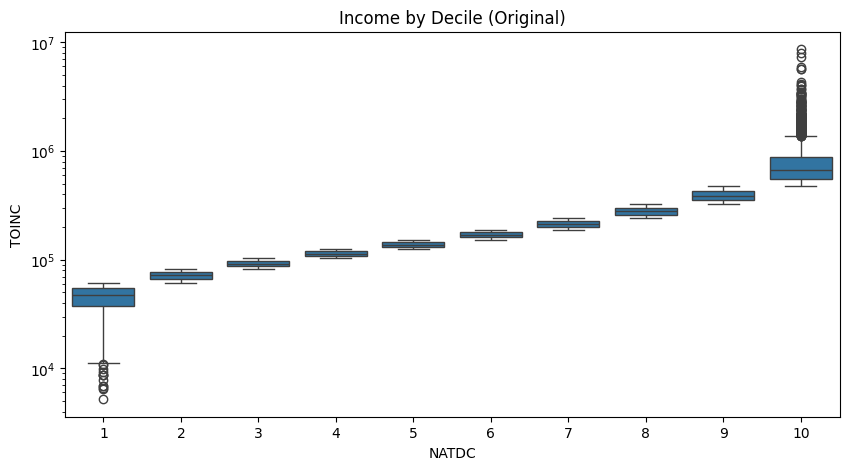

In [75]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='NATDC', y='TOINC', data=fies_df)
plt.title("Income by Decile (Original)")
plt.yscale('log') 
plt.show()

#### Total Expenditures

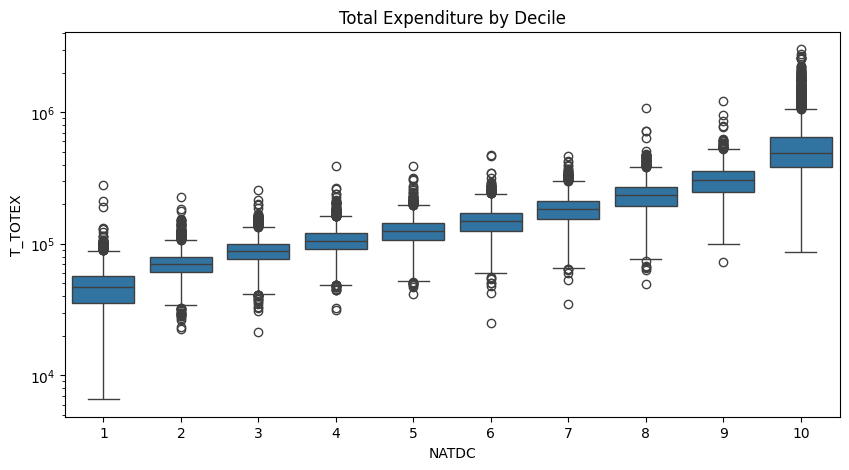

In [77]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='NATDC', y='T_TOTEX', data=fies_df)
plt.title("Total Expenditure by Decile")
plt.yscale('log') 
plt.show()

#### Discretionary Expenditures

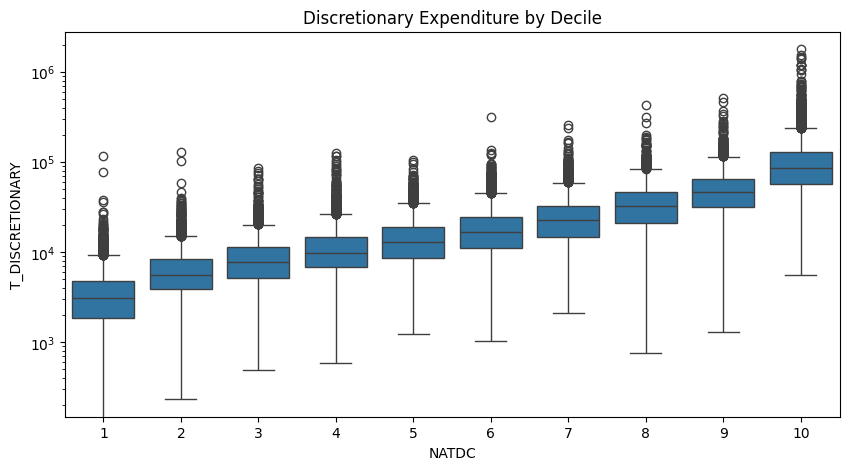

In [79]:
fies_df['T_DISCRETIONARY'] = fies_df['T_RECREATION'] + fies_df['T_TRANSPORT'] + fies_df['T_MISCELLANEOUS']

plt.figure(figsize=(10, 5))
sns.boxplot(x='NATDC', y='T_DISCRETIONARY', data=fies_df)
plt.title("Discretionary Expenditure by Decile")
plt.yscale('log') 
plt.show()

#### Food Expenditures

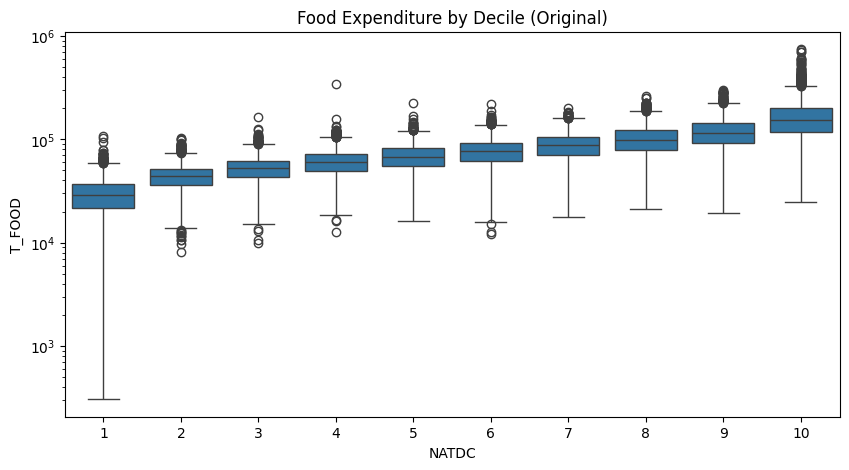

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='NATDC', y='T_FOOD', data=fies_df)
plt.title("Food Expenditure by Decile")
plt.yscale('log') 
plt.show()

#### Education Expenditures

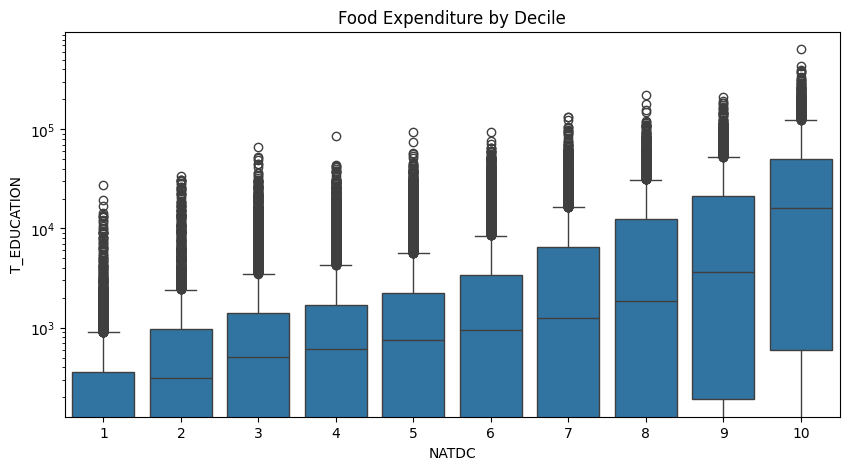

In [78]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='NATDC', y='T_EDUCATION', data=fies_df)
plt.title("Food Expenditure by Decile")
plt.yscale('log') 
plt.show()

### EDA Question 1:  What are the average and median incomes in each income group? 


In this analysis, we will be calculating the average and median incomes of each income group.

To get the division of each income group, we will use quantiles. Since we have lower, middle, and upper classes, we will divide them into three (3) parts.

In [11]:
fies_df['Income_Group'] = pd.qcut(fies_df['PCINC'], q=3, labels=['Lower', 'Middle', 'Upper'])

Since they are now classified, we can now aggregate the data to get the average and median of each income group and display it.

In [15]:
income_stats_per_class = fies_df.groupby('Income_Group')['PCINC'].agg(['mean', 'median'])
print(income_stats_per_class)

                       mean     median
Income_Group                          
Lower          16268.642329  16561.915
Middle         34236.573362  33369.750
Upper         112469.280228  82804.465


C:\Users\Trish Ann Aguarin\AppData\Local\Temp\ipykernel_23612\2302645387.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_stats_per_class = fies_df.groupby('Income_Group')['PCINC'].agg(['mean', 'median'])


### EDA Question 2: Which expenditure category takes up the largest portion of total expenses for each group?

We need to get every single expenditure group for this question, therefore, we need to list them down in an variable called **expense_cols**.  

We set a new column for these expenditure groups, adding a `_PCT` to store the value of percentage of the total expense spent on that certain category. These categories are divided by `T_TOTEX` to get the percentages for each one. 

Then, for each income group, we average the percentage for each category before getting the portion with the highest total expense by finding the maximum average percentage.  

In [19]:
expense_cols = ['T_FOOD', 'T_CLOTH', 'T_FURNISHING', 'T_HEALTH', 'T_HOUSING_WATER', 'T_RENTVAL'
                ,'T_TRANSPORT', 'T_COMMUNICATION', 'T_RECREATION', 'T_EDUCATION', 'T_MISCELLANEOUS'
                ,'T_OTHER_EXPENDITURE', 'T_OTHER_DISBURSEMENT']

for col in expense_cols:
    fies_df[col + '_PCT'] = fies_df[col] / fies_df['T_TOTEX']

expense_proportions = fies_df.groupby('Income_Group')[[col + '_PCT' for col in expense_cols]].mean()

largest_expense_category = expense_proportions.idxmax(axis=1)
print("\nLargest Expense Category per Income Group:\n", largest_expense_category)


Largest Expense Category per Income Group:
 Income_Group
Lower     T_FOOD_PCT
Middle    T_FOOD_PCT
Upper     T_FOOD_PCT
dtype: object


C:\Users\Trish Ann Aguarin\AppData\Local\Temp\ipykernel_23612\3980724775.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  expense_proportions = fies_df.groupby('Income_Group')[[col + '_PCT' for col in expense_cols]].mean()


### EDA Question 3: Do wealthier households spend a higher or lower percentage of their income on basic needs like food?

//description here

In [ ]:
fies_df['Basic_Needs'] = fies_df['T_FOOD'] / fies_df['PCINC'] * 100
basic_needs_stats = fies_df.groupby('Income_Group')['Basic_Needs'].mean() 
print("\nAverage Percentage of Income Spent on Basic Needs:\n", basic_needs_stats)


Average Percentage of Income Spent on Basic Needs:
 Income_Group
Lower     0.004362
Middle    0.001673
Upper     0.000504
Name: Basic_Needs, dtype: float64


C:\Users\Trish Ann Aguarin\AppData\Local\Temp\ipykernel_23612\2064034986.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  basic_needs_stats = fies_df.groupby('Income_Group')['Basic_Needs'].mean()


### EDA Question 4: Are low-income households more likely to prioritize essential expenses over discretionary (e.g., entertainment, travel) ones

In this analysis, we calculate the average percentage of household expenditure that is allocated to **discretionary categories**: recreation, transportation, and miscellaneous expenses. 

We compute a new column `T_DISCRETIONARY`, sum these three categories, and then divide it by `T_TOTEX` (total household expenditure) to get the proportion. We then group the data by income decile (`NATDC`) and calculate the average for each group.


In [ ]:
fies_df['T_DISCRETIONARY'] = fies_df['T_RECREATION'] + fies_df['T_TRANSPORT'] + fies_df['T_MISCELLANEOUS']
fies_df['PCT_DISCRETIONARY'] = fies_df['T_DISCRETIONARY'] / fies_df['T_TOTEX']

discretionary_avg = fies_df.groupby('NATDC')['PCT_DISCRETIONARY'].mean().reset_index()
discretionary_avg.columns = ['Income Decile', 'Avg % Discretionary Spending']
discretionary_avg['Avg % Discretionary Spending'] = (discretionary_avg['Avg % Discretionary Spending'] * 100).round(2).astype(str) + '%'

print("EDA Question 4: Avg % of Total Expenditure on Discretionary Items")
print(discretionary_avg.to_string(index=False))

EDA Question 4: Avg % of Total Expenditure on Discretionary Items
 Income Decile Avg % Discretionary Spending
             1                         7.7%
             2                        9.31%
             3                       10.09%
             4                       10.99%
             5                       11.82%
             6                       12.84%
             7                       13.89%
             8                       15.46%
             9                       16.71%
            10                       18.99%


### EDA Question 5: How does the ratio of entertainment spending to income change as income increases?

We compare how much of a household's budget goes to **essential** needs (food and housing/utilities) versus **discretionary** items. We calculate:
- `PCT_ESSENTIAL` = (food + housing/utilities) / total expenditure

We then group by income decile and calculate the average percentages to identify spending priorities across income groups.


In [11]:
fies_df['T_ESSENTIAL'] = fies_df['T_FOOD'] + fies_df['T_HOUSING_WATER']
fies_df['PCT_ESSENTIAL'] = fies_df['T_ESSENTIAL'] / fies_df['T_TOTEX']

priority_avg = fies_df.groupby('NATDC')[['PCT_ESSENTIAL', 'PCT_DISCRETIONARY']].mean().reset_index()
priority_avg.columns = ['Income Decile', 'Avg % Essential', 'Avg % Discretionary']
priority_avg['Avg % Essential'] = (priority_avg['Avg % Essential'] * 100).round(2).astype(str) + '%'
priority_avg['Avg % Discretionary'] = (priority_avg['Avg % Discretionary'] * 100).round(2).astype(str) + '%'

print("\nEDA Question 5: Essential vs Discretionary Spending (% of Total Expenditure)")
print(priority_avg.to_string(index=False))



EDA Question 5: Essential vs Discretionary Spending (% of Total Expenditure)
 Income Decile Avg % Essential Avg % Discretionary
             1          81.93%                7.7%
             2          78.84%               9.31%
             3          77.09%              10.09%
             4          75.67%              10.99%
             5          74.06%              11.82%
             6          71.66%              12.84%
             7          69.47%              13.89%
             8          65.21%              15.46%
             9          60.97%              16.71%
            10           53.1%              18.99%


### EDA Question 6: How does the ratio of education spending to income change as income increases?

We assess whether higher-income households allocate a greater share of their income to education. To do this, we calculate the ratio of education spending (`T_EDUCATION`) to total income (`TOINC`) for each household.

We then compute the average of this ratio for each income decile to observe the trend across income levels.


In [12]:
fies_df = fies_df[fies_df['TOINC'] > 0]
fies_df['PCT_EDUC_INC'] = fies_df['T_EDUCATION'] / fies_df['TOINC']

education_pct = fies_df.groupby('NATDC')['PCT_EDUC_INC'].mean().reset_index()
education_pct.columns = ['Income Decile', 'Avg % of Income Spent on Education']
education_pct['Avg % of Income Spent on Education'] = (education_pct['Avg % of Income Spent on Education'] * 100).round(1).astype(str) + '%'

print("\nEDA Question 6: Avg % of Income Spent on Education")
print(education_pct.to_string(index=False))


EDA Question 6: Avg % of Income Spent on Education
 Income Decile Avg % of Income Spent on Education
             1                               0.8%
             2                               1.4%
             3                               1.8%
             4                               1.9%
             5                               2.2%
             6                               2.6%
             7                               3.0%
             8                               3.5%
             9                               3.9%
            10                               4.5%


Start here for Q7